In [1]:
from platform import python_version
print(python_version())

3.8.5


In [2]:
# Check version inside your Python program
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
# Step_1 Import Library packages

from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import math 
%matplotlib inline

In [4]:
pwd

'C:\\Seetha\\MSITM Courses\\ISM 646\\Group Projects\\Project_1\\Python_file'

In [5]:
# Step_2 Import Dataset 

covid_data = pd.read_csv("CountryLevel_COVID-19_Dataset 1.csv")
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,positive_rate,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
0,AFG,Asia,Afghanistan,1/31/2021,55023.0,15.0,2400.0,0.0,1413.443,0.385,...,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59
1,ALB,Europe,Albania,1/31/2021,78127.0,876.0,1380.0,11.0,27148.169,304.399,...,0.247,tests performed,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08
2,DZA,Africa,Algeria,1/31/2021,107339.0,217.0,2891.0,3.0,2447.810,4.949,...,NaN,NaN,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,6.73
3,AND,Europe,Andorra,1/31/2021,9937.0,52.0,101.0,0.0,128609.332,673.008,...,0.085,people tested,77265.0,163.755,NaN,NaN,NaN,NaN,109.135,7.97
4,AGO,Africa,Angola,1/31/2021,19796.0,14.0,466.0,2.0,602.320,0.426,...,NaN,NaN,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94


In [6]:
#Total Rows & Columns
covid_data.shape 

(63395, 24)

In [7]:
# Column info
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63395 entries, 0 to 63394
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  63035 non-null  object 
 1   continent                 62659 non-null  object 
 2   location                  63395 non-null  object 
 3   date                      63395 non-null  object 
 4   total_cases               62789 non-null  float64
 5   new_cases                 62781 non-null  float64
 6   total_deaths              54174 non-null  float64
 7   new_deaths                54172 non-null  float64
 8   total_cases_per_million   62429 non-null  float64
 9   new_cases_per_million     62421 non-null  float64
 10  total_deaths_per_million  53827 non-null  float64
 11  new_deaths_per_million    53825 non-null  float64
 12  total_tests_per_thousand  30007 non-null  float64
 13  new_tests_per_thousand    30222 non-null  float64
 14  positi

In [8]:
# Returns Aggregation values
covid_data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
count,6.278900e+04,62781.000000,5.417400e+04,54172.000000,62429.000000,62421.000000,53827.000000,53825.000000,30007.000000,30222.000000,32226.000000,6.303500e+04,61703.000000,60306.000000,59608.000000,59965.000000,60349.000000,60964.000000,61681.000000
mean,3.361523e+05,3254.174798,1.056278e+04,82.263494,5858.315668,61.008230,143.411508,1.290516,133.607554,1.254383,0.084394,9.032253e+07,324.002859,30.611606,8.832468,5.600023,19147.674295,256.598684,7.773309
std,3.312829e+06,28758.928653,8.496584e+04,616.350001,11878.665762,164.618408,264.643537,3.883220,272.934839,3.004219,0.099113,6.171315e+08,1577.347275,9.122253,6.253936,4.272049,19655.262159,118.134385,3.902773
min,1.000000e+00,-46076.000000,1.000000e+00,-1918.000000,0.001000,-2153.437000,0.001000,-76.445000,0.000000,-6.320000,0.000000,8.090000e+02,1.980000,15.100000,1.144000,0.526000,661.240000,79.370000,0.990000
25%,5.270000e+02,1.000000,2.900000e+01,0.000000,111.857000,0.084000,4.928000,0.000000,7.073500,0.095250,0.014000,2.722291e+06,36.253000,22.200000,3.466000,2.043000,4541.795000,167.295000,5.290000
50%,5.518000e+03,46.000000,1.690000e+02,1.000000,862.923000,5.136000,25.143000,0.085000,33.917000,0.438000,0.047000,9.890400e+06,82.805000,29.900000,6.614000,3.871000,13111.214000,242.648000,7.110000
75%,5.707400e+04,513.000000,1.549000e+03,12.000000,5327.728000,46.950000,135.834000,0.942000,141.329000,1.378000,0.120000,3.286627e+07,208.354000,39.100000,14.312000,9.167000,27216.445000,325.721000,10.080000
max,1.029740e+08,852678.000000,2.228207e+06,17489.000000,128609.332000,8652.658000,1974.188000,218.329000,3030.552000,327.086000,0.636000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,724.417000,30.530000


In [9]:
covid_data.index

RangeIndex(start=0, stop=63395, step=1)

In [10]:
# Step_3
# My Dataset for visualization
my_covid_data = covid_data[['iso_code', 'continent','location','date', 'total_cases','total_deaths',"total_cases_per_million",
                            'total_tests_per_thousand','new_tests_per_thousand','positive_rate','tests_units', 'population', 'gdp_per_capita']]
my_covid_data.head()

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_units,population,gdp_per_capita
0,AFG,Asia,Afghanistan,1/31/2021,55023.0,2400.0,1413.443,NaN,NaN,NaN,NaN,38928341.0,1803.987
1,ALB,Europe,Albania,1/31/2021,78127.0,1380.0,27148.169,119.226,1.093,0.247,tests performed,2877800.0,11803.431
2,DZA,Africa,Algeria,1/31/2021,107339.0,2891.0,2447.810,NaN,NaN,NaN,NaN,43851043.0,13913.839
3,AND,Europe,Andorra,1/31/2021,9937.0,101.0,128609.332,NaN,NaN,0.085,people tested,77265.0,NaN
4,AGO,Africa,Angola,1/31/2021,19796.0,466.0,602.320,NaN,NaN,NaN,NaN,32866268.0,5819.495


In [11]:
my_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63395 entries, 0 to 63394
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  63035 non-null  object 
 1   continent                 62659 non-null  object 
 2   location                  63395 non-null  object 
 3   date                      63395 non-null  object 
 4   total_cases               62789 non-null  float64
 5   total_deaths              54174 non-null  float64
 6   total_cases_per_million   62429 non-null  float64
 7   total_tests_per_thousand  30007 non-null  float64
 8   new_tests_per_thousand    30222 non-null  float64
 9   positive_rate             32226 non-null  float64
 10  tests_units               35267 non-null  object 
 11  population                63035 non-null  float64
 12  gdp_per_capita            60349 non-null  float64
dtypes: float64(8), object(5)
memory usage: 6.3+ MB


In [12]:
#Step_4 Datatype "Date" Coversion

my_covid_data["date"] = pd.to_datetime(my_covid_data["date"], errors = 'coerce')

<ipython-input-12-4b962add1aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_covid_data["date"] = pd.to_datetime(my_covid_data["date"], errors = 'coerce')


In [13]:
my_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63395 entries, 0 to 63394
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  63035 non-null  object        
 1   continent                 62659 non-null  object        
 2   location                  63395 non-null  object        
 3   date                      63395 non-null  datetime64[ns]
 4   total_cases               62789 non-null  float64       
 5   total_deaths              54174 non-null  float64       
 6   total_cases_per_million   62429 non-null  float64       
 7   total_tests_per_thousand  30007 non-null  float64       
 8   new_tests_per_thousand    30222 non-null  float64       
 9   positive_rate             32226 non-null  float64       
 10  tests_units               35267 non-null  object        
 11  population                63035 non-null  float64       
 12  gdp_per_capita    

In [14]:
# Step_5 Count of Null-values
my_covid_data.count()
# 736 rows with continent as NaN
my_covid_data[my_covid_data['continent'].isna()]

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_units,population,gdp_per_capita
78,NaN,NaN,International,2021-01-31,721.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,OWID_WRL,NaN,World,2021-01-31,102973957.0,2228207.0,13210.599,NaN,NaN,NaN,NaN,7.794799e+09,15469.207
270,NaN,NaN,International,2021-01-30,721.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,OWID_WRL,NaN,World,2021-01-30,102590758.0,2220272.0,13161.438,NaN,NaN,NaN,NaN,7.794799e+09,15469.207
462,NaN,NaN,International,2021-01-29,721.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63279,OWID_WRL,NaN,World,2020-01-26,2118.0,56.0,0.272,NaN,NaN,NaN,NaN,7.794799e+09,15469.207
63294,OWID_WRL,NaN,World,2020-01-25,1433.0,42.0,0.184,NaN,NaN,NaN,NaN,7.794799e+09,15469.207
63307,OWID_WRL,NaN,World,2020-01-24,941.0,26.0,0.121,NaN,NaN,NaN,NaN,7.794799e+09,15469.207
63318,OWID_WRL,NaN,World,2020-01-23,655.0,18.0,0.084,NaN,NaN,NaN,NaN,7.794799e+09,15469.207


In [15]:
# Count of rows where continent, country and date are not null
my_covid_data[pd.notnull(my_covid_data[["continent","location","date"]])].count()

iso_code                        0
continent                   62659
location                    63395
date                        63395
total_cases                     0
total_deaths                    0
total_cases_per_million         0
total_tests_per_thousand        0
new_tests_per_thousand          0
positive_rate                   0
tests_units                     0
population                      0
gdp_per_capita                  0
dtype: int64

In [16]:
#Step_6 Data Cleaning

#Remove the rows where Continent, location, and date are null
my_covid_data = my_covid_data.dropna(axis=0, subset=['continent','location', 'date'])

In [17]:
my_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62659 entries, 0 to 63394
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  62659 non-null  object        
 1   continent                 62659 non-null  object        
 2   location                  62659 non-null  object        
 3   date                      62659 non-null  datetime64[ns]
 4   total_cases               62053 non-null  float64       
 5   total_deaths              53451 non-null  float64       
 6   total_cases_per_million   62053 non-null  float64       
 7   total_tests_per_thousand  30007 non-null  float64       
 8   new_tests_per_thousand    30222 non-null  float64       
 9   positive_rate             32226 non-null  float64       
 10  tests_units               35267 non-null  object        
 11  population                62659 non-null  float64       
 12  gdp_per_capita    

In [18]:
#Count of nut-null in 'continent','location', 'date' 
my_covid_data[pd.notnull(my_covid_data[['continent','location', 'date']])].count()

iso_code                        0
continent                   62659
location                    62659
date                        62659
total_cases                     0
total_deaths                    0
total_cases_per_million         0
total_tests_per_thousand        0
new_tests_per_thousand          0
positive_rate                   0
tests_units                     0
population                      0
gdp_per_capita                  0
dtype: int64

In [19]:
#Remove all rows which contains null-values
my_covid_data = my_covid_data.dropna()

In [20]:
my_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25220 entries, 1 to 62690
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  25220 non-null  object        
 1   continent                 25220 non-null  object        
 2   location                  25220 non-null  object        
 3   date                      25220 non-null  datetime64[ns]
 4   total_cases               25220 non-null  float64       
 5   total_deaths              25220 non-null  float64       
 6   total_cases_per_million   25220 non-null  float64       
 7   total_tests_per_thousand  25220 non-null  float64       
 8   new_tests_per_thousand    25220 non-null  float64       
 9   positive_rate             25220 non-null  float64       
 10  tests_units               25220 non-null  object        
 11  population                25220 non-null  float64       
 12  gdp_per_capita    

In [21]:
##total tests conducted per population
my_covid_data["total_tests"] = my_covid_data["total_tests_per_thousand"] * my_covid_data["population"]/1000

In [22]:
my_covid_data

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_units,population,gdp_per_capita,total_tests
1,ALB,Europe,Albania,2021-01-31,78127.0,1380.0,27148.169,119.226,1.093,0.247,tests performed,2877800.0,11803.431,3.431086e+05
12,BHR,Asia,Bahrain,2021-01-31,103057.0,375.0,60565.368,1587.395,8.255,0.038,units unclear,1701583.0,43290.705,2.701084e+06
13,BGD,Asia,Bangladesh,2021-01-31,535139.0,8127.0,3249.384,22.157,0.074,0.035,tests performed,164689383.0,3523.984,3.649023e+06
16,BEL,Europe,Belgium,2021-01-31,710153.0,21092.0,61274.938,714.053,1.894,0.055,tests performed,11589616.0,42658.576,8.275600e+06
19,BTN,Asia,Bhutan,2021-01-31,859.0,1.0,1113.254,614.977,3.112,0.000,samples tested,771612.0,8708.597,4.745236e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62530,JPN,Asia,Japan,2020-02-17,67.0,1.0,0.530,0.003,0.001,0.122,people tested,126476458.0,39002.223,3.794294e+02
62571,JPN,Asia,Japan,2020-02-16,60.0,1.0,0.474,0.002,0.001,0.151,people tested,126476458.0,39002.223,2.529529e+02
62613,JPN,Asia,Japan,2020-02-15,54.0,1.0,0.427,0.002,0.001,0.165,people tested,126476458.0,39002.223,2.529529e+02
62652,JPN,Asia,Japan,2020-02-14,43.0,1.0,0.340,0.001,0.000,0.204,people tested,126476458.0,39002.223,1.264765e+02


In [23]:
print(my_covid_data)

      iso_code continent    location       date  total_cases  total_deaths  \
1          ALB    Europe     Albania 2021-01-31      78127.0        1380.0   
12         BHR      Asia     Bahrain 2021-01-31     103057.0         375.0   
13         BGD      Asia  Bangladesh 2021-01-31     535139.0        8127.0   
16         BEL    Europe     Belgium 2021-01-31     710153.0       21092.0   
19         BTN      Asia      Bhutan 2021-01-31        859.0           1.0   
...        ...       ...         ...        ...          ...           ...   
62530      JPN      Asia       Japan 2020-02-17         67.0           1.0   
62571      JPN      Asia       Japan 2020-02-16         60.0           1.0   
62613      JPN      Asia       Japan 2020-02-15         54.0           1.0   
62652      JPN      Asia       Japan 2020-02-14         43.0           1.0   
62690      JPN      Asia       Japan 2020-02-13         33.0           1.0   

       total_cases_per_million  total_tests_per_thousand  \
1  

In [24]:


#Returns aggregation results for the data
my_covid_data.describe()

,total_cases,total_deaths,total_cases_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,population,gdp_per_capita,total_tests
count,2.522000e+04,25220.000000,25220.000000,25220.000000,25220.000000,25220.000000,2.522000e+04,25220.000000,2.522000e+04
mean,2.196685e+05,5889.195361,7785.945667,146.382059,1.322359,0.089090,5.109439e+07,24876.343098,3.292447e+06
std,8.518260e+05,18124.003556,12650.116642,287.447767,2.416915,0.102717,1.556557e+08,21424.183399,1.345015e+07
min,3.000000e+00,1.000000,0.081000,0.001000,-6.320000,0.000000,3.412500e+05,1095.042000,7.382112e+01
25%,4.156500e+03,69.000000,446.603750,10.703000,0.124000,0.016000,4.822233e+06,7894.393000,1.328767e+05
50%,2.488250e+04,402.000000,2099.749000,42.844500,0.497000,0.050000,1.181862e+07,22267.037000,5.140690e+05
75%,1.389362e+05,2827.000000,8599.109000,161.291000,1.486250,0.125000,4.373376e+07,35938.374000,1.947292e+06
max,2.410403e+07,399033.000000,80495.099000,3030.552000,32.383000,0.636000,1.380004e+09,116935.600000,2.801623e+08


In [25]:
#Step_7 Plot_1 Dataframe

covid_plot1 = pd.DataFrame(my_covid_data, columns = ["continent", "location", "total_cases", "total_tests", "population"])

covid_plot1 = covid_plot1.groupby(by = ["location"]).mean()

covid_plot1 = covid_plot1.rename(columns = {"total_cases" : "Avg_cases", "total_tests" : "Avg_tests", 
                                            "population" : "Avg_population"}).sort_values('Avg_cases', ascending = False).round(2)
                                                                                          
covid_plot1.head(98)



,Avg_cases,Avg_tests,Avg_population
location,,,
United States,7008891.36,96932139.16,3.310026e+08
India,4576940.70,66670699.22,1.380004e+09
Russia,1247477.06,40643495.92,1.459345e+08
United Kingdom,917412.78,22428426.01,6.788600e+07
Colombia,901650.76,4344472.48,5.088288e+07
...,...,...,...
Tunisia,1545.22,68191.38,1.181862e+07
Mongolia,1500.57,813787.14,3.278292e+06
Vietnam,1066.94,1115104.72,9.733858e+07


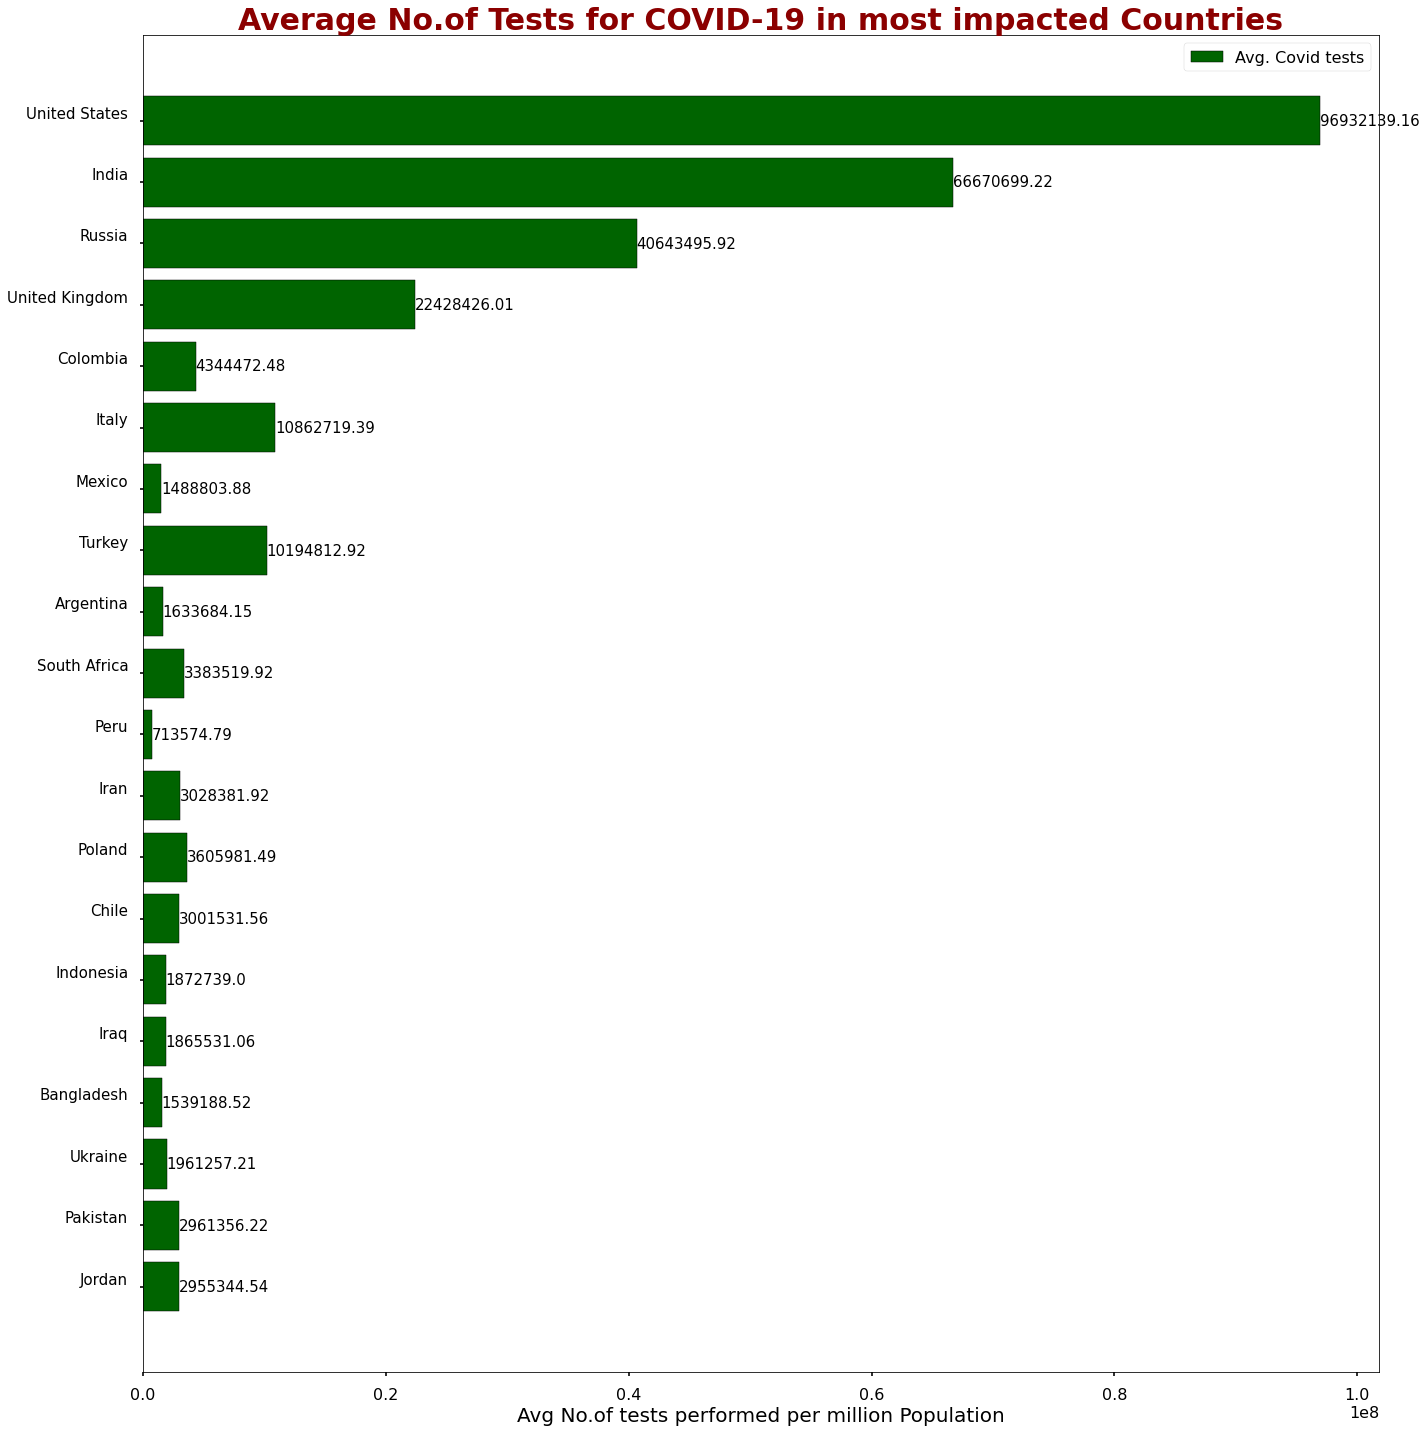

In [26]:
# Step_8 Avg number of tests conducted in the most impacted countries relative to population size.

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')
plt.rcParams["figure.figsize"] = (20,20)

top_n = 20
covid_plot1 = covid_plot1[0:top_n] 

width = 0.60 

x = covid_plot1.index
y = covid_plot1["Avg_tests"]

fig = plt.barh(covid_plot1.index, covid_plot1["Avg_tests"], 
               label= "Avg. Covid tests", color="Darkgreen", edgecolor = "black")

plt.yticks(rotation = "horizontal", verticalalignment = "bottom", 
           fontsize = 15, color = 'black')
plt.xlabel("Avg No.of tests performed per million Population", 
           fontsize = 20, color = "black")
plt.title("Average No.of Tests for COVID-19 in most impacted Countries", 
          fontsize = 30, 
          weight = "bold", color = "darkred")

for index,value in enumerate(covid_plot1["Avg_tests"]):
    plt.text(value, index, str(value), fontsize = 15, color = 'black', va='center')
                 
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
#plt.show()
#plt.savefig("Avg. Covid tests in most impacted countries.png")



In [27]:
# Step_9 Total COVID-19 tests per thousand Vs. GDP per Capita

covid_plot2 = pd.DataFrame(my_covid_data, columns = ["continent", "location", "total_tests_per_thousand", "gdp_per_capita"])

covid_plot2 = covid_plot2.groupby(by = ["location"]).mean()
covid_plot2 = covid_plot2.rename(columns = {"total_tests_per_thousand" : 
                                            "Avg. of total_tests_per_thousand"}).sort_values("Avg. of total_tests_per_thousand", 
                                                                                             ascending = False).round(2)


In [28]:
covid_plot2.head(50)

,Avg. of total_tests_per_thousand,gdp_per_capita
location,,
Luxembourg,1132.08,94277.96
United Arab Emirates,913.70,67293.48
Bahrain,725.96,43290.71
Denmark,650.06,46682.52
Malta,519.98,36513.32
Bhutan,511.52,8708.60
Cyprus,477.41,32415.13
Israel,390.64,33132.32
Iceland,357.87,46482.96


Statistics of Linear Regression : 
 LinregressResult(slope=0.005854907998315592, intercept=5.85907714382202, rvalue=0.6343418920196646, pvalue=2.3391918893800375e-12, stderr=0.0007282326152301078)


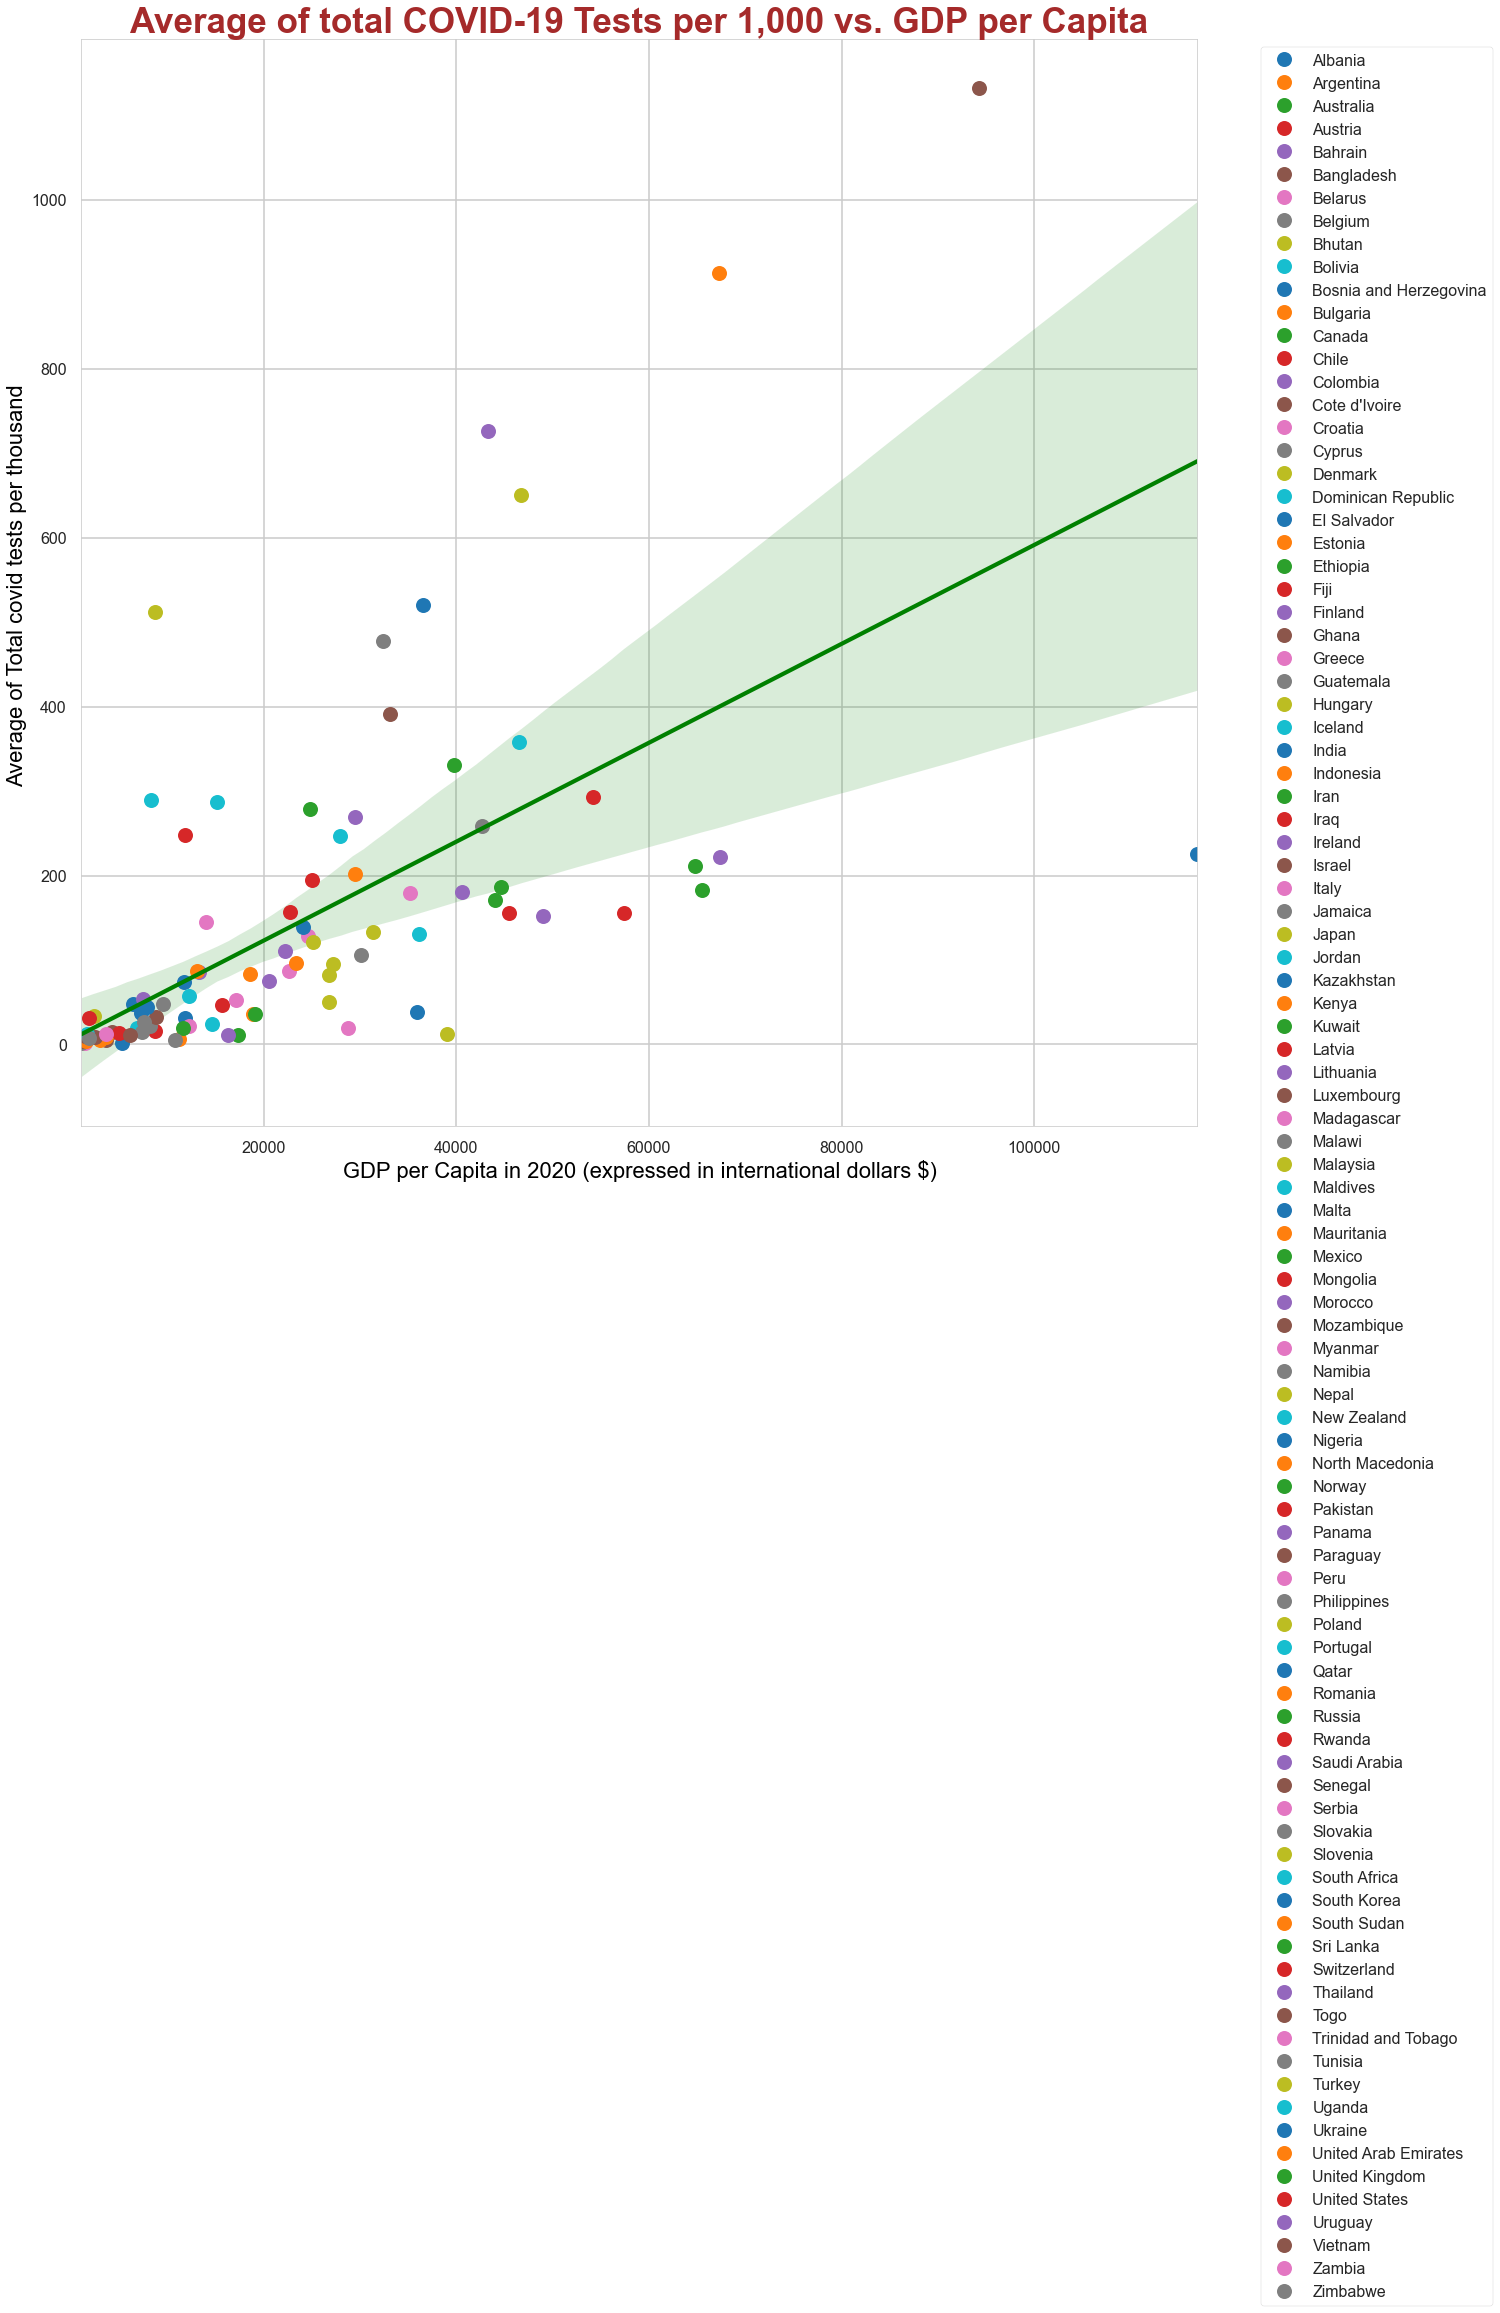

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from scipy.stats import linregress
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20,20)

top_n = 100
covid_plot2 = covid_plot2[0:top_n]

fig, ax = plt.subplots()
ax.margins(0.05)

groups = covid_plot2.groupby("location")
for name, group in groups:
    plt.plot(group["gdp_per_capita"], group["Avg. of total_tests_per_thousand"], 
             marker="o", linestyle="", ms =15, label = name)

# ---Regression Line---

x = covid_plot2["gdp_per_capita"]
y = covid_plot2["Avg. of total_tests_per_thousand"]

stats = linregress(x, y)
print("Statistics of Linear Regression : \n",stats)
m, b = np.polyfit(x, y, 1) 
m = stats.slope
b= stats.intercept

sns.regplot(x, y, color = 'green') 
#plt.plot(x, m * x + b,color = 'green') # y = slope * x + intercept

plt.title("Average of total COVID-19 Tests per 1,000 vs. GDP per Capita", fontsize = 35, 
           weight = "bold", color = 'brown')

plt.xlabel("GDP per Capita in 2020 (expressed in international dollars $)", 
           fontsize = 22, color = 'black')
plt.ylabel("Average of Total covid tests per thousand ", fontsize = 22, color = 'black')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.show()
#plt.savefig("Covid tests Vs GDP.png")

In [30]:
#Step_10 Avg number of tests performed in the countries with highest deaths.Share of COVID-19 tests that are positive.

covid_plot3 = pd.DataFrame(my_covid_data, columns = ["continent", "location", "date", "total_deaths", "total_tests", 
                                                     "population"])

covid_plot3 = covid_plot3.groupby(by = ["location"]).mean()

covid_plot3 = covid_plot3.rename(columns = {"total_deaths" : "Avg_deaths", "total_tests" : "Avg_tests", 
                                            "population" : "Avg_population"}).sort_values('Avg_deaths', ascending = False).round(2)
                                                                                          
covid_plot3[0:70] 

,Avg_deaths,Avg_tests,Avg_population
location,,,
United States,171803.83,96932139.16,3.310026e+08
India,71042.31,66670699.22,1.380004e+09
Mexico,60767.72,1488803.88,1.289328e+08
United Kingdom,47286.06,22428426.01,6.788600e+07
Italy,39030.05,10862719.39,6.046183e+07
...,...,...,...
Zimbabwe,229.16,119879.99,1.486293e+07
Malaysia,223.16,1613297.43,3.236600e+07
Belarus,219.41,501009.67,9.449321e+06


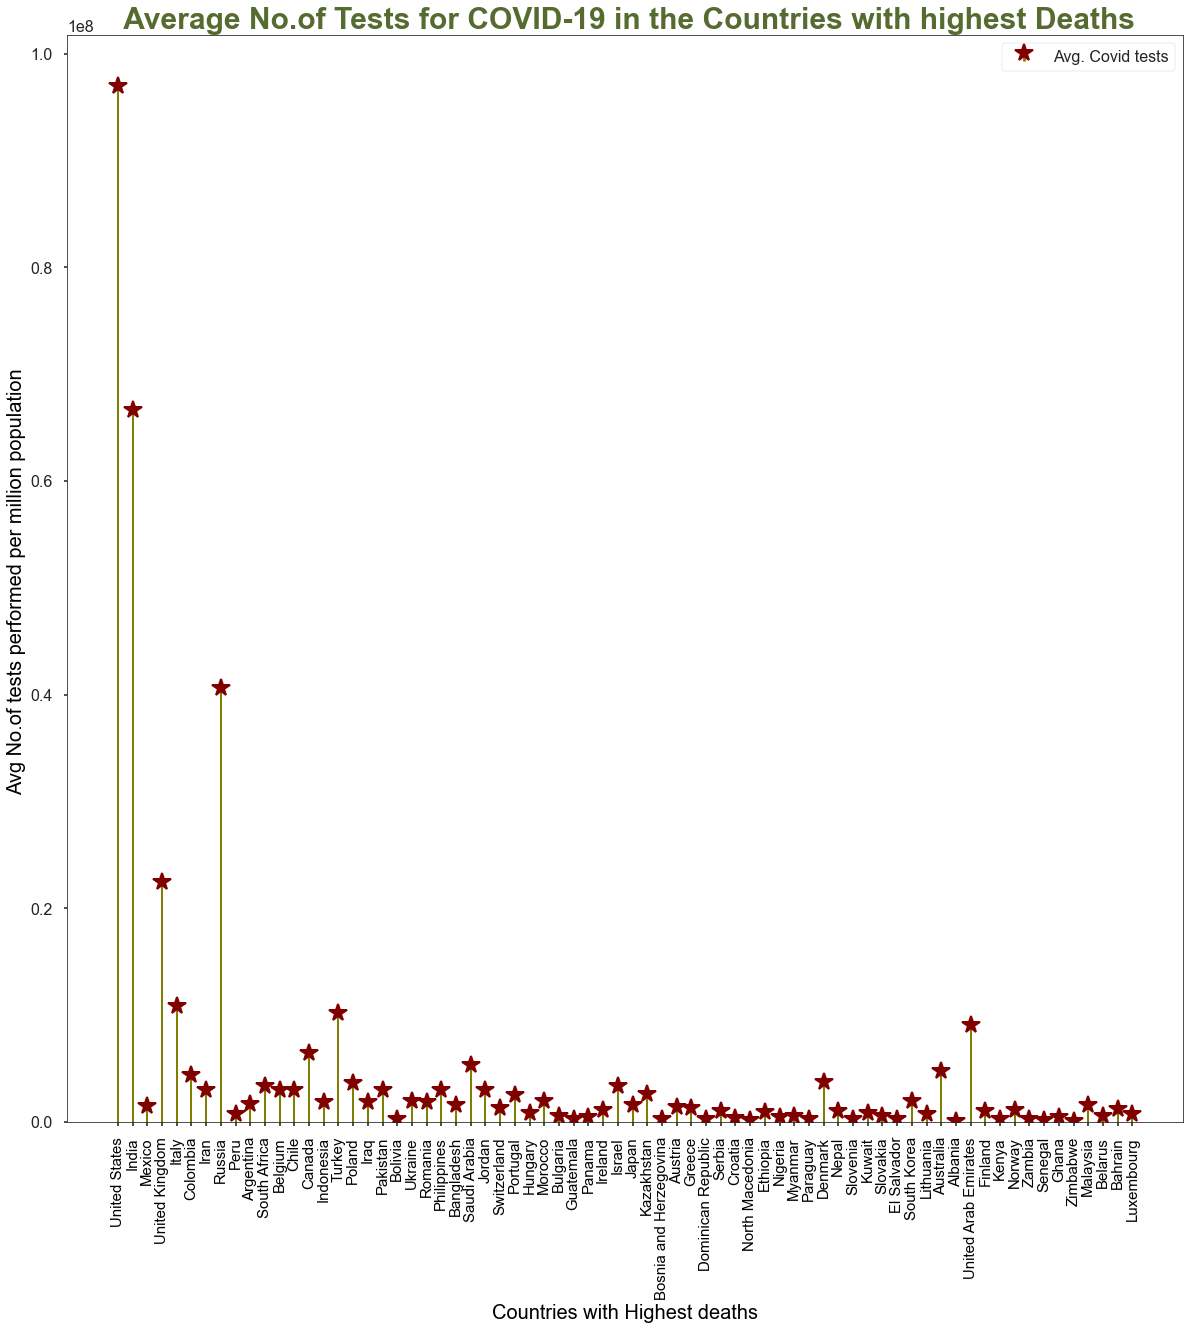

In [31]:
# Step_11 Avg number of tests performed in the countries with highest deaths.

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (20,20)

top_n = 70
covid_plot3 = covid_plot3[0:top_n]

x = covid_plot3.index
y = covid_plot3["Avg_tests"]

(markerline, stemlines, baseline) = plt.stem(covid_plot3.index,
                                             covid_plot3["Avg_tests"], label= "Avg. Covid tests")
plt.setp(markerline, marker='*', markersize=18,
         markeredgewidth=2, color='maroon')
plt.setp(stemlines, color= "olive", linestyle="-", linewidth= 2)
plt.setp(baseline, visible=False)

plt.xticks(rotation = "vertical", fontsize = 15, color = 'black')
##plt.tick_params(rotation = "default", labelsize=16)

plt.xlabel("Countries with Highest deaths", fontsize = 20, color = "black")
plt.ylabel("Avg No.of tests performed per million population ", fontsize = 20, color = "black")

plt.title(" Average No.of Tests for COVID-19 in the Countries with highest Deaths", fontsize = 30, 
        weight = "bold", color = "darkolivegreen")
plt.legend()
plt.ylim(bottom=0)

#plt.show()
#plt.savefig("Avg. Covid tests in highest death Countries.png")

In [32]:
## Step_12 Share of COVID-19 tests that are positive.

covid_plot4 = pd.DataFrame(my_covid_data, columns = ["continent", "location", "date", "total_tests", "positive_rate"])


In [33]:
covid_plot4["Month_Year"] = covid_plot4["date"].dt.strftime('%m-%Y')

In [34]:
covid_plot4.head()

,continent,location,date,total_tests,positive_rate,Month_Year
1,Europe,Albania,2021-01-31,3.431086e+05,0.247,01-2021
12,Asia,Bahrain,2021-01-31,2.701084e+06,0.038,01-2021
13,Asia,Bangladesh,2021-01-31,3.649023e+06,0.035,01-2021
16,Europe,Belgium,2021-01-31,8.275600e+06,0.055,01-2021
19,Asia,Bhutan,2021-01-31,4.745236e+05,0.000,01-2021


In [35]:
covid_plot4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25220 entries, 1 to 62690
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   continent      25220 non-null  object        
 1   location       25220 non-null  object        
 2   date           25220 non-null  datetime64[ns]
 3   total_tests    25220 non-null  float64       
 4   positive_rate  25220 non-null  float64       
 5   Month_Year     25220 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.3+ MB


In [36]:
covid_plot4.head(20)

,continent,location,date,total_tests,positive_rate,Month_Year
1,Europe,Albania,2021-01-31,3.431086e+05,0.247,01-2021
12,Asia,Bahrain,2021-01-31,2.701084e+06,0.038,01-2021
13,Asia,Bangladesh,2021-01-31,3.649023e+06,0.035,01-2021
16,Europe,Belgium,2021-01-31,8.275600e+06,0.055,01-2021
19,Asia,Bhutan,2021-01-31,4.745236e+05,0.000,01-2021
20,South America,Bolivia,2021-01-31,5.606089e+05,0.333,01-2021
25,Europe,Bulgaria,2021-01-31,1.389599e+06,0.053,01-2021
30,North America,Canada,2021-01-31,1.748337e+07,0.070,01-2021
36,South America,Colombia,2021-01-31,1.005751e+07,0.183,01-2021
40,Africa,Cote d'Ivoire,2021-01-31,3.444739e+05,0.061,01-2021


In [37]:
# Randomly selected 10 major COVID-19 Impacted Countries

#India
India = covid_plot4[covid_plot4['location']=='India']

#Italy
Italy = covid_plot4[covid_plot4['location']=='Italy']

#Mexico
Mexico = covid_plot4[covid_plot4['location']=='Mexico']

#Turkey
Turkey = covid_plot4[covid_plot4['location']=='Turkey']

#Iran
Iran = covid_plot4[covid_plot4['location']=='Iran']

#UK
UK = covid_plot4[covid_plot4['location']=='United Kingdom']

#Russia
Russia = covid_plot4[covid_plot4['location']=='Russia']

#Canada
Canada = covid_plot4[covid_plot4['location']=='Canada']

#US
US = covid_plot4[covid_plot4['location']=='United States']

#UAE
UAE = covid_plot4[covid_plot4['location']=='United Arab Emirates']

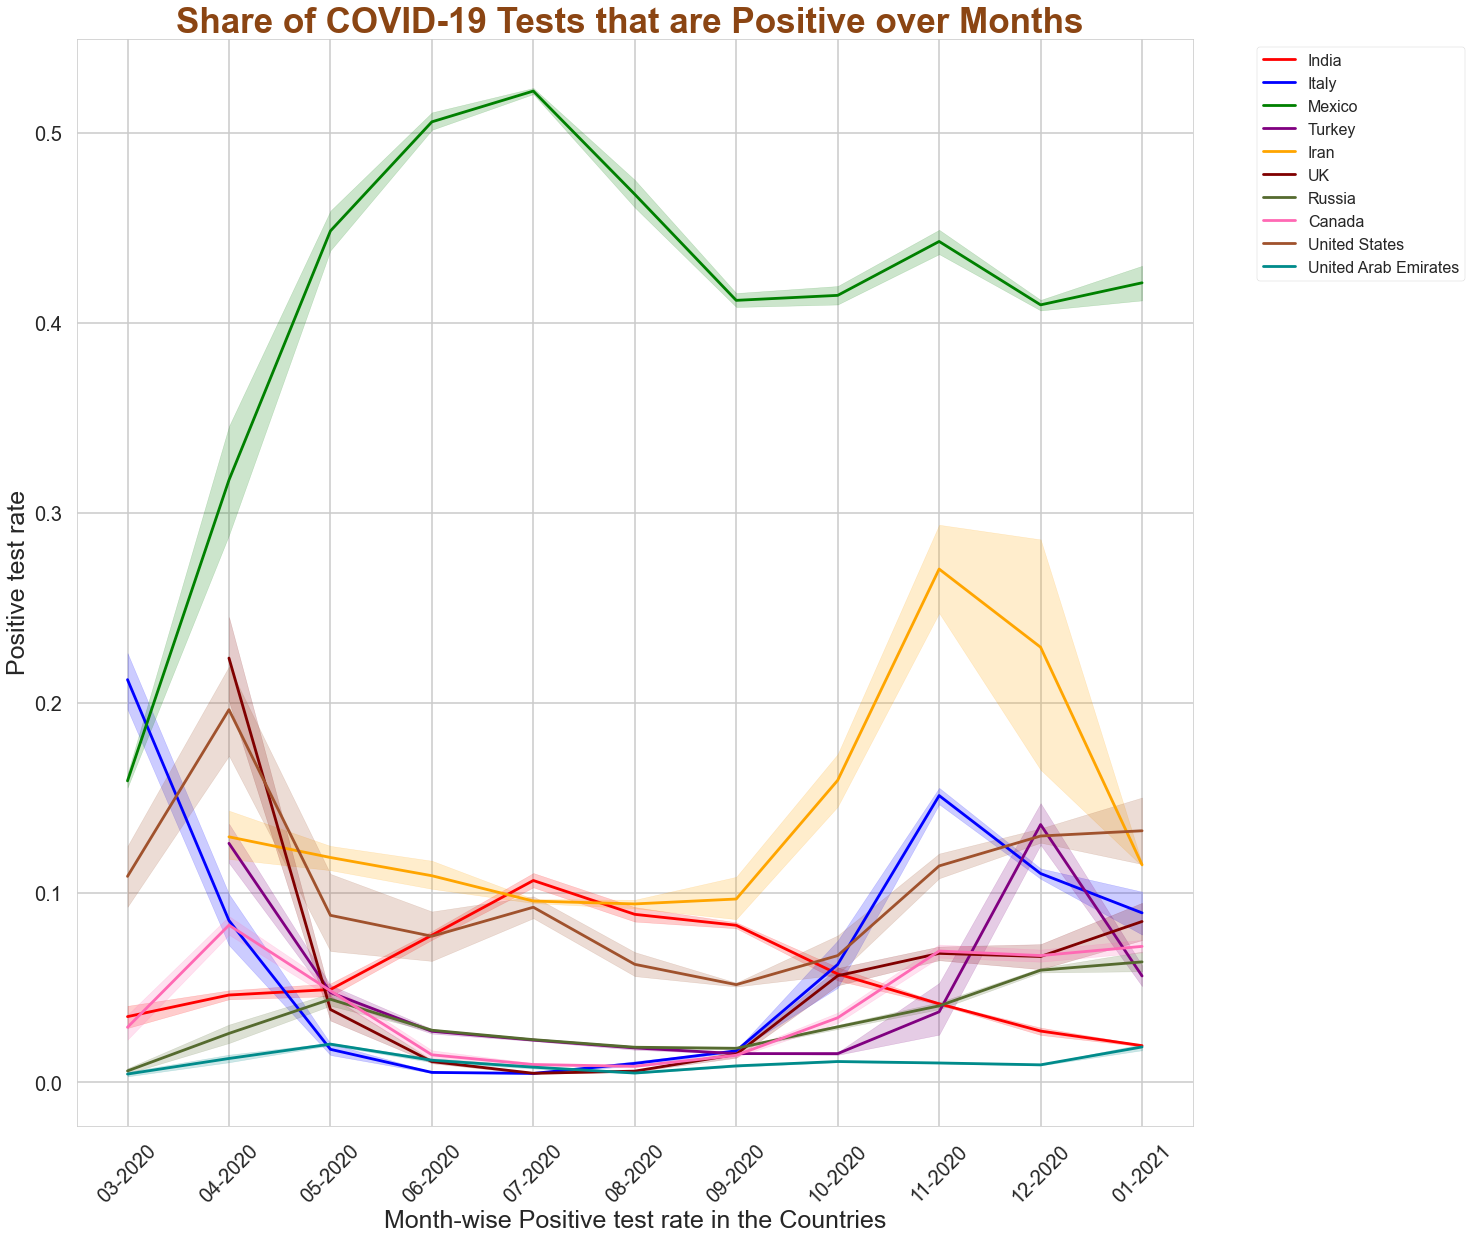

In [38]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.rcParams["figure.figsize"] = (20,20)


ax = sns.lineplot(x= India.Month_Year, y = India.positive_rate, label = "India", color = "red")
ax = sns.lineplot(x= Italy.Month_Year, y = Italy.positive_rate, label = "Italy", color = "blue")
ax = sns.lineplot(x= Mexico.Month_Year, y = Mexico.positive_rate, label = "Mexico", color = "green")
ax = sns.lineplot(x= Turkey.Month_Year, y = Turkey.positive_rate, label = "Turkey", color = "purple")
ax = sns.lineplot(x= Iran.Month_Year, y = Iran.positive_rate, label = "Iran", color = "orange")
ax = sns.lineplot(x= UK.Month_Year, y = UK.positive_rate, label = "UK", color = "maroon")
ax = sns.lineplot(x= Russia.Month_Year, y = Russia.positive_rate, label = "Russia", color = "darkolivegreen")
ax = sns.lineplot(x= Canada.Month_Year, y = Canada.positive_rate, label = "Canada", color = "hotpink")
ax = sns.lineplot(x= US.Month_Year, y = US.positive_rate, label = "United States", color = "sienna")
ax = sns.lineplot(x= UAE.Month_Year, y = UAE.positive_rate, label = "United Arab Emirates", color = "darkcyan")


plt.xlabel("Month-wise Positive test rate in the Countries",fontsize = 25)
plt.ylabel("Positive test rate",fontsize = 25)
plt.title("Share of COVID-19 Tests that are Positive over Months ", fontsize = 35, 
          weight = "bold", color = "saddlebrown")

plt.xticks(rotation = 45 ,fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_xaxis()

#plt.show()
#plt.savefig("share of COVID-19 tests that are positive.png")

In [39]:
## Correlation Matrix using Heatmap

covid_plot5 = pd.DataFrame(my_covid_data, columns = ["continent","location","date", "total_cases","total_deaths",
                                                     "tests_units","total_tests", 
                                                     'total_tests_per_thousand','new_tests_per_thousand','positive_rate', 
                                                     'population', 'gdp_per_capita' ])
covid_plot5.head()

,continent,location,date,total_cases,total_deaths,tests_units,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,population,gdp_per_capita
1,Europe,Albania,2021-01-31,78127.0,1380.0,tests performed,3.431086e+05,119.226,1.093,0.247,2877800.0,11803.431
12,Asia,Bahrain,2021-01-31,103057.0,375.0,units unclear,2.701084e+06,1587.395,8.255,0.038,1701583.0,43290.705
13,Asia,Bangladesh,2021-01-31,535139.0,8127.0,tests performed,3.649023e+06,22.157,0.074,0.035,164689383.0,3523.984
16,Europe,Belgium,2021-01-31,710153.0,21092.0,tests performed,8.275600e+06,714.053,1.894,0.055,11589616.0,42658.576
19,Asia,Bhutan,2021-01-31,859.0,1.0,samples tested,4.745236e+05,614.977,3.112,0.000,771612.0,8708.597


Text(0.5, 1.0, 'Correlation matrix of COVID-19 Testing data')

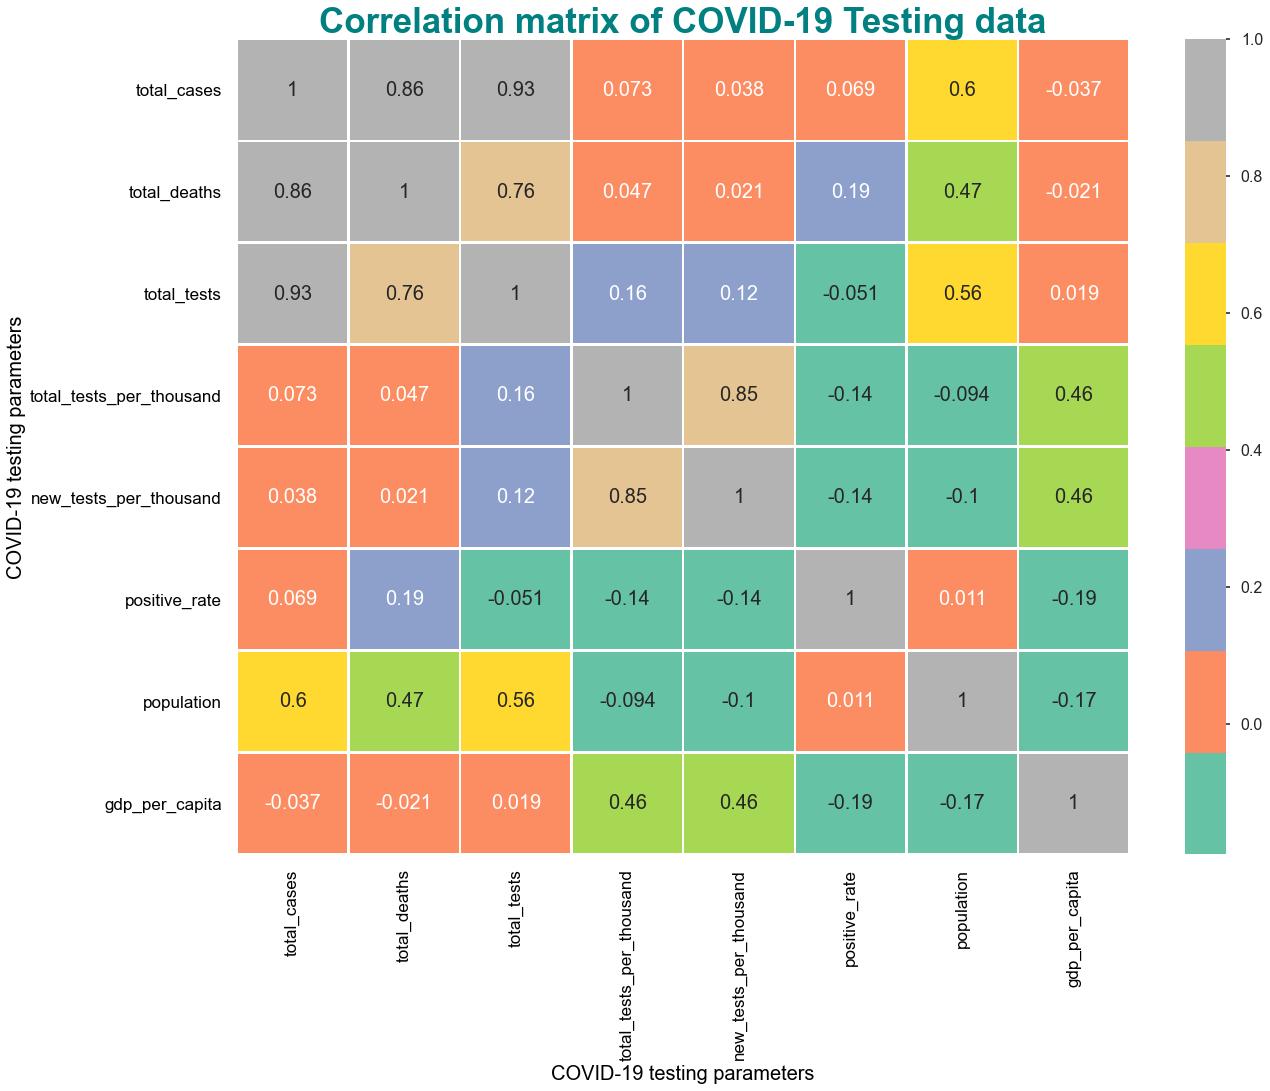

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)

#covid_plot5_small = covid_plot5.iloc[:,:7]

correlation_mat = covid_plot5.corr()

sns.heatmap(correlation_mat, annot = True, annot_kws={"size":20}, 
            cmap='Set2', linewidths= 1.5)

plt.xlabel("COVID-19 testing parameters", fontsize = 20, color = "black")
plt.ylabel("COVID-19 testing parameters", fontsize = 20, color = "black")

plt.xticks(fontsize = 17, color = "black")
plt.yticks(rotation = 'horizontal', fontsize = 17, color = "black")

plt.title("Correlation matrix of COVID-19 Testing data",fontsize = 35, 
          color = "teal",  weight = "bold")

#plt.show()
#plt.savefig("COVID-19_testing_Correlation.png")